In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import classes.nb_general as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

In [2]:
class GraphLibrary:
    
    def __init__(self, direc=''):
        self.direc = direc

    def save_graph(self,G,graph_descrip):
        """ Given a graph and description, save it in our home directory. """
        
        with open('{}/graph_descriptions.txt'.format(self.direc), 'r+') as log_:
            i = len(log_.readlines())
            # Record our graph & Description
            log_.write("Graph {}: {}\n".format(i,graph_descrip))
            log_.close()

        nx.write_gml(G,r"{}/graph_{}.gml".format(self.direc,i),str)
        
    def load_graph(self, k):
        """ Given an index, load the specific graph. """
        
        with open('{}/graph_descriptions.txt'.format(self.direc), 'r+') as log_:    
            
            descrip_ = log_.readlines()[k]
            
        G = nx.read_gml(r"{}/graph_{}.gml".format(self.direc,k))
        
        return G, descrip_ 

In [6]:
def run(G, a_=.95):
    A = nx.adjacency_matrix(G).todense()
    C, B = NB_G.to_edge_space(G,graph=False, B = True)
    S, T = NB_G.create_s_t(G)
    D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))
    D = np.array(A.sum(axis=1)).reshape(A.shape[1],)

    # Get page rank of the edge space
    pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=a_)).values()))
    
    # 'Spring Paper Eqn' 
    eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))

    # Get page rank of the vertex space
    pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=a_)).values()))
    pr_v_w = pr_v/D
    

    # Get projection of edge space to vertex space of appropriate page rank vectors
    pr_ = T@pr_e
    pr_w = pr_/D
    pr_2 = T@eqn(a_)
    pr_2_w = pr_2/D

    # Show Graphs
    plt.figure(figsize=(15,5))
    #plt.suptitle('Comparison of Graphs\n', fontsize=25)
    plt.subplot(121)
    plt.title("Normal Graph - $B$", fontsize=15)
    nx.draw(G,with_labels=True)
    plt.subplot(122)
    plt.title("Edge Space Graph - $\mathfrak{B}$", fontsize=15)
    nx.draw(nx.from_numpy_array(B), with_labels=True)
    plt.show()

    # Show Page Rank Values
    DOMAIN = np.arange(0, len(pr_v), 1)
    plt.figure(figsize=(15,5))
    plt.title("Page Rank Values", fontsize=25)
    plt.plot(DOMAIN, pr_v, 'o--', label='Original')
    plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
    #plt.plot(DOMAIN, pr_2,  'o--', label='Non-backtrack Springer')
    plt.legend(loc='best', fontsize=20)
    plt.xlabel("Vertex", fontsize=20)
    plt.ylabel("Node Value", fontsize=2)
    plt.show()
    
    return pr_v, pr_

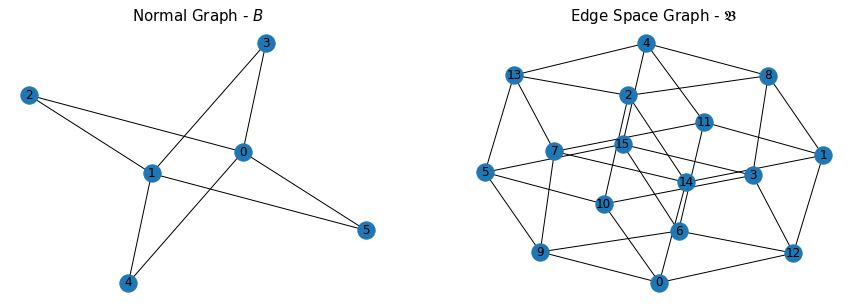

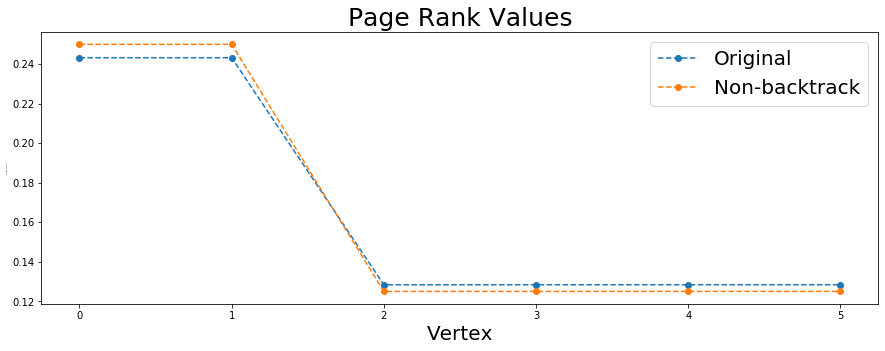

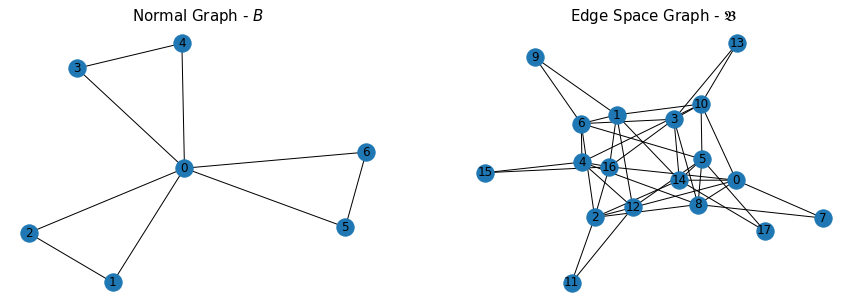

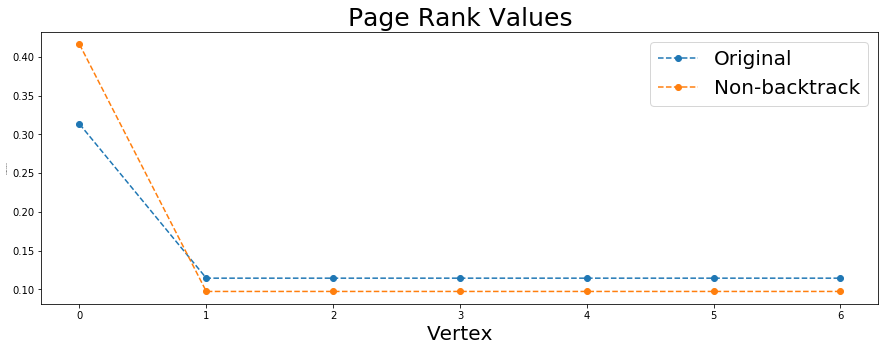

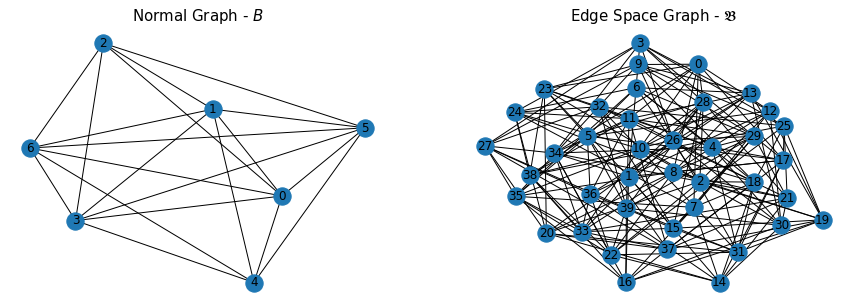

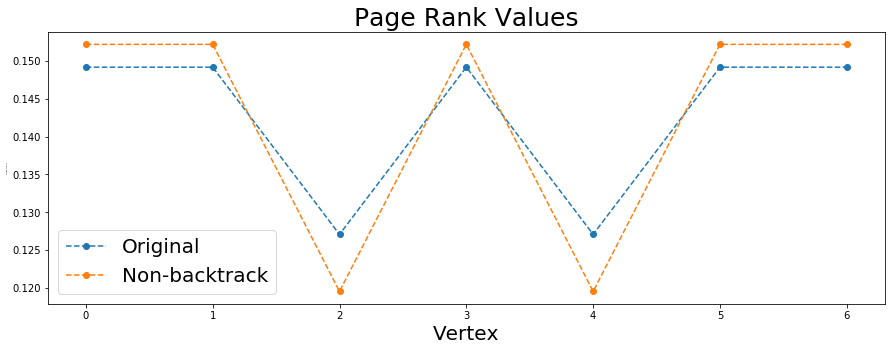

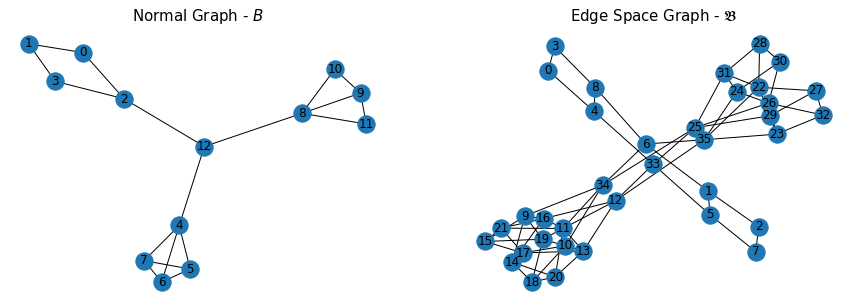

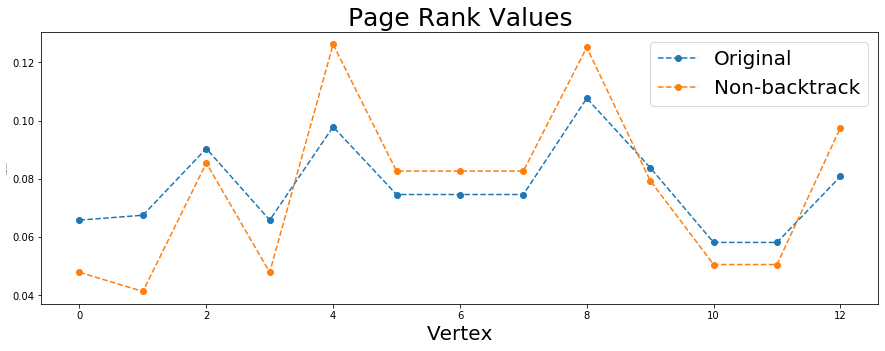

In [7]:
GAO = GraphLibrary('Test_Graphs/GRAPHS')
for i in range(4):
    G, descrip = GAO.load_graph(k=i)
    run(G)
    print("\n")

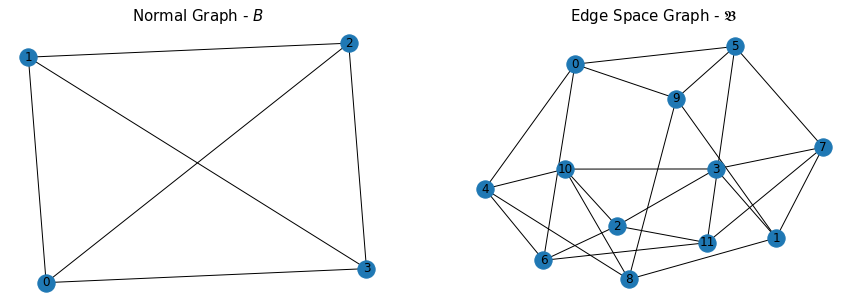

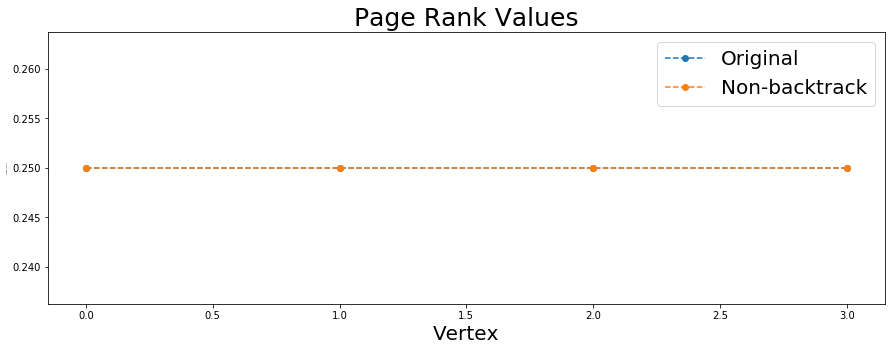

(array([0.25, 0.25, 0.25, 0.25]), array([0.25, 0.25, 0.25, 0.25]))

In [8]:
G = nx.complete_graph(4)
run(G)